In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches_df=pd.read_csv("ipl matches 2008-2020 datasheet.csv")
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
matches_df.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [5]:
matches_df[matches_df['city'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [6]:
matches_df['city'].fillna('Dubai', inplace=True)
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matches_df[matches_df['winner'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [8]:
matches_df['winner'].fillna('Draw', inplace=True)
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
matches_df=matches_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches_df


,team1,team2,city,toss_decision,toss_winner,venue,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,field,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Pune,field,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Rajkot,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Indore,field,Kings XI Punjab,Holkar Cricket Stadium,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore
...,...,...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai,field,Mumbai Indians,Wankhede Stadium,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,Chennai,bat,Chennai Super Kings,M. A. Chidambaram Stadium,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,Visakhapatnam,field,Delhi Capitals,ACA-VDCA Stadium,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,Visakhapatnam,field,Chennai Super Kings,ACA-VDCA Stadium,Chennai Super Kings


In [11]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          756 non-null    object
 1   team2          756 non-null    object
 2   city           756 non-null    object
 3   toss_decision  756 non-null    object
 4   toss_winner    756 non-null    object
 5   venue          756 non-null    object
 6   winner         756 non-null    object
dtypes: object(7)
memory usage: 41.5+ KB


In [12]:
matches_df=matches_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,field,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Pune,field,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Rajkot,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Indore,field,Kings XI Punjab,Holkar Cricket Stadium,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore
...,...,...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai,field,Mumbai Indians,Wankhede Stadium,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,Chennai,bat,Chennai Super Kings,M. A. Chidambaram Stadium,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,Visakhapatnam,field,Delhi Capitals,ACA-VDCA Stadium,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,Visakhapatnam,field,Chennai Super Kings,ACA-VDCA Stadium,Chennai Super Kings


In [13]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          756 non-null    object
 1   team2          756 non-null    object
 2   city           756 non-null    object
 3   toss_decision  756 non-null    object
 4   toss_winner    756 non-null    object
 5   venue          756 non-null    object
 6   winner         756 non-null    object
dtypes: object(7)
memory usage: 41.5+ KB


In [14]:
matches_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [15]:
team_encodings={
    'Mumbai Indians' : 1,
    'Sunrisers Hyderabad':2,
    'Royal Challengers Bangalore':3,
    'Kolkata Knight Riders':4,
    'Gujarat Lions':5,
    'Delhi Daredevils':6,
    'Delhi Capitals':6,
    'Kings XI Punjab':7,
    'Chennai Super Kings':8,
    'Rajasthan Royals':9,
    'Rising Pune Supergiant':10,
    'Rising Pune Supergiants':10,
    'Deccan Chargers':11,
    'Pune Warriors':12,
    'Kochi Tuskers Kerala':13,
    'Draw':14
}
team_encode_dict={
    'team1': team_encodings,
    'team2': team_encodings,
    'toss_winner':team_encodings,
    'winner': team_encodings
}

matches_df.replace(team_encode_dict, inplace=True)

In [16]:
matches_df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",2
1,1,10,Pune,field,10,Maharashtra Cricket Association Stadium,10
2,5,4,Rajkot,field,4,Saurashtra Cricket Association Stadium,4
3,10,7,Indore,field,7,Holkar Cricket Stadium,7
4,3,6,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [17]:
from sklearn.preprocessing import LabelEncoder
ftr_list=['city','toss_decision','venue']
encoder=LabelEncoder()
for ftr in ftr_list:
    matches_df[ftr]=encoder.fit_transform(matches_df[ftr])
    print(encoder.classes_)

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

In [18]:
matches_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,15,1,3,28,2
1,1,10,27,1,10,21,10
2,5,4,29,1,4,31,4
3,10,7,16,1,7,13,7
4,3,6,2,0,3,17,3
...,...,...,...,...,...,...,...
751,4,1,24,1,1,40,1
752,8,1,8,0,8,18,1
753,2,6,32,1,6,0,6
754,6,8,32,1,8,0,8


# graph between team1 and winner

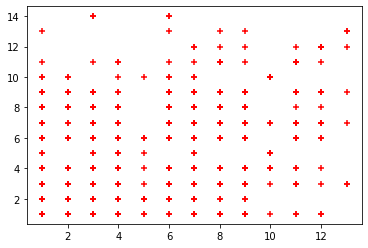

In [19]:
plt.scatter(matches_df.team1, matches_df.winner, marker='+', color='red')

# graph between team1 and winner

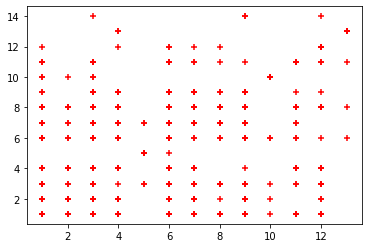

In [20]:
plt.scatter(matches_df.team2, matches_df.winner, marker='+', color='red')

# Train_Test_Split

In [21]:
x=matches_df.drop(['winner'], axis=1)

In [22]:
y=matches_df['winner']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model= LogisticRegression()

In [27]:
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
model.predict(x_test)

array([ 4,  4,  1,  4,  7,  4,  1,  8,  7,  4,  4,  9,  4, 11,  3,  1,  4,
        1,  1,  7,  3,  8,  8,  1,  9,  1,  3,  8,  1,  8,  3,  7,  1,  1,
        8,  1,  8,  7,  3,  1,  8,  8,  8,  9,  7,  4, 11,  4,  1,  4,  4,
        1,  8,  1,  3,  8,  8,  7,  8,  1,  1,  4,  8,  9,  3,  8,  1,  1,
        7,  8,  8,  3,  4,  1,  8,  8,  7,  7,  3,  1,  1,  3,  1,  1,  3,
        1,  8,  1,  1,  4,  7,  8,  4,  4,  3,  1,  4,  7,  4,  8,  3,  7,
        8,  1,  7,  8,  8,  4,  8,  8,  4,  3,  1,  4,  3,  1,  8,  4,  4,
        8,  7,  1,  3,  8,  3,  8,  8,  8,  4,  3,  7,  7,  4,  8,  3,  4,
        8,  4,  8,  1,  4,  7,  8,  8,  8,  1,  1,  4,  8, 11,  8, 14],
      dtype=int64)

In [29]:
model.score(x_test, y_test)

0.2631578947368421

# Decision Tree Classifier

In [30]:
from sklearn import tree

In [31]:
model2 = tree.DecisionTreeClassifier()

In [32]:
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
model2.score(x_test, y_test)

0.5460526315789473

In [34]:
model2.predict(x_test)

array([ 4,  2,  2,  4,  9,  3,  2,  6,  6,  2,  9, 11,  4,  3,  7,  8, 11,
        2,  3,  4,  7,  8,  4,  6,  1,  1,  6,  9,  4,  6,  9,  7,  6,  7,
       11,  3,  4,  7,  7,  1,  9,  3,  6,  3,  7,  3, 11,  4,  1,  4,  5,
        1, 12,  4,  9, 12,  4,  7,  4,  1,  1,  1,  8,  6,  1, 11,  2, 10,
        8,  4,  4,  3,  8,  2,  4,  3,  6,  7,  2,  1,  2,  9,  7,  4,  8,
        1,  6,  1,  1,  4,  7,  7,  3,  3,  2,  7,  4,  3,  7,  2,  7,  6,
        5,  7,  6,  8,  1,  2,  4,  8,  4,  1,  1,  1,  6,  5,  9,  9,  9,
        4,  7,  6,  8,  7,  3,  4,  6,  3,  4,  4,  9,  7, 11,  9,  1,  6,
        9,  4,  6,  9,  3,  8, 11, 13,  8, 10,  8,  6,  3, 11,  6,  3],
      dtype=int64)

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model3 = RandomForestClassifier(n_estimators=10)

In [37]:
model3.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [38]:
model3.score(x_test,y_test)

0.5131578947368421

In [39]:
model3.predict(x_test)

array([ 4,  2,  2,  4,  9,  3,  2,  6,  6,  2,  9, 11,  4,  3,  2,  8, 11,
        2,  2,  4,  7,  8,  4,  2, 11,  1,  3,  9,  6,  6,  9,  6,  7,  7,
        8,  2,  4,  7,  7,  1,  6,  3,  6,  9,  7,  6, 11,  4,  1,  4,  5,
        1, 12,  4,  9, 12,  4,  7,  3,  1,  1,  1,  8,  7,  1,  8,  2, 10,
        8,  4,  4,  3,  1,  6,  4,  3,  9,  7,  2,  1,  2,  9,  7,  4,  8,
       10,  6,  1,  1,  4,  7,  7,  3,  6,  2,  1,  4,  3,  8,  1,  7, 11,
        6,  7,  6,  8,  1,  2,  4,  8,  4,  1,  2,  1, 14,  1,  9,  9,  9,
        4,  7,  6,  8,  6,  9,  4,  6,  4,  4,  4,  9,  7,  4,  9,  1, 10,
        7, 13,  6,  1,  3,  8,  8, 11,  8, 10,  8,  9,  7, 11, 11,  3],
      dtype=int64)

# SVC 

In [40]:
from sklearn.svm import SVC

In [41]:
model4=SVC()

In [42]:
model4.fit(x_train, y_train)

SVC()

In [43]:
model4.score(x_test,y_test)

0.4407894736842105

In [44]:
model4.predict(x_test)

array([4, 6, 2, 4, 9, 2, 2, 9, 6, 4, 4, 9, 4, 8, 7, 1, 4, 2, 1, 9, 3, 8,
       6, 2, 9, 4, 3, 9, 1, 6, 9, 8, 1, 2, 9, 1, 4, 6, 2, 1, 9, 8, 8, 9,
       9, 6, 6, 4, 1, 4, 4, 1, 9, 2, 7, 9, 4, 7, 9, 1, 1, 4, 8, 9, 3, 4,
       2, 1, 8, 4, 4, 3, 4, 1, 4, 9, 6, 7, 3, 1, 2, 7, 2, 2, 8, 8, 6, 1,
       1, 4, 6, 1, 4, 6, 7, 1, 4, 3, 8, 7, 2, 6, 8, 1, 6, 8, 9, 6, 7, 8,
       4, 6, 2, 4, 3, 4, 9, 4, 4, 1, 7, 1, 3, 8, 9, 6, 6, 7, 4, 3, 8, 8,
       8, 1, 8, 4, 7, 4, 6, 1, 4, 8, 6, 8, 8, 1, 8, 1, 7, 6, 8, 3],
      dtype=int64)

# k fold

In [45]:
from sklearn.model_selection import KFold

In [46]:
kf= KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [47]:
for train_index, test_index in kf.split(x):
    print(train_index, test_index)   

[252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 49

In [48]:
def get_score(model, x_train, x_test,y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [49]:
get_score(LogisticRegression(),x_train,x_test,y_train,y_test)

0.2631578947368421

In [50]:
get_score(SVC(),x_train,x_test,y_train,y_test)

0.4407894736842105

In [51]:
get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test)

0.5394736842105263

# cross validation scores

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
cross_val_score(LogisticRegression(),x,y)

array([0.25      , 0.30463576, 0.25827815, 0.27152318, 0.28476821])

In [54]:
cross_val_score(tree.DecisionTreeClassifier(),x,y)

array([0.49342105, 0.49006623, 0.52317881, 0.47019868, 0.49668874])

In [55]:
cross_val_score(RandomForestClassifier(n_estimators=10),x,y)

array([0.48684211, 0.49006623, 0.45695364, 0.45033113, 0.49668874])

In [56]:
cross_val_score(SVC(),x,y)

array([0.36184211, 0.39735099, 0.40397351, 0.35099338, 0.41059603])